Mathematical transforms are ones where we apply a mathematical function on the data

By doing these transformations our data's distribution become gaussian/normal

ML algorithms do assume that the data is normally distributed (some of the them, not all)

### Function transformer

Using this transformer we can do these transformations:
1) log
2) reciprocal
3) square root
4) custom ones

### How to find if the data is normal?

1) Call sns.distplot
2) Call pd.skew()
3) Use qq plot

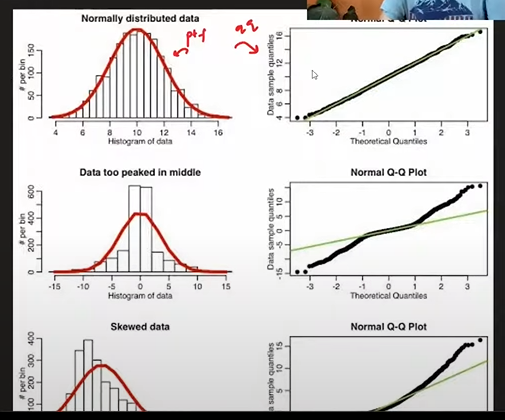

As far away from the line we are the more away we are from normal distribution

### Log transform

We just take the log10 of all the data

When to use log transform?
1) When we don't have negative values (ex: age)
2) When the data is right skewed

### Other transforms

1) Reciprocal: Take all data (x) and make it (1/x)
2) Square: Use mainly for left skewed data
3) Square root

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.sample(5)

,Survived,Age,Fare
541,0,9.0,31.275
542,0,11.0,31.275
846,0,NaN,69.550
77,0,NaN,8.050
757,0,18.0,11.500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
# fill the missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [7]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [8]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_28136\2888751792.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


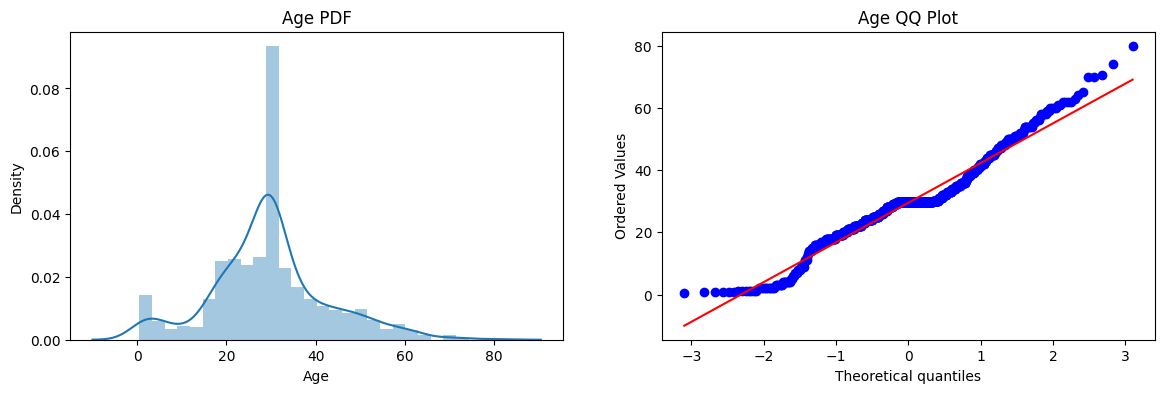

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_28136\2981780686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


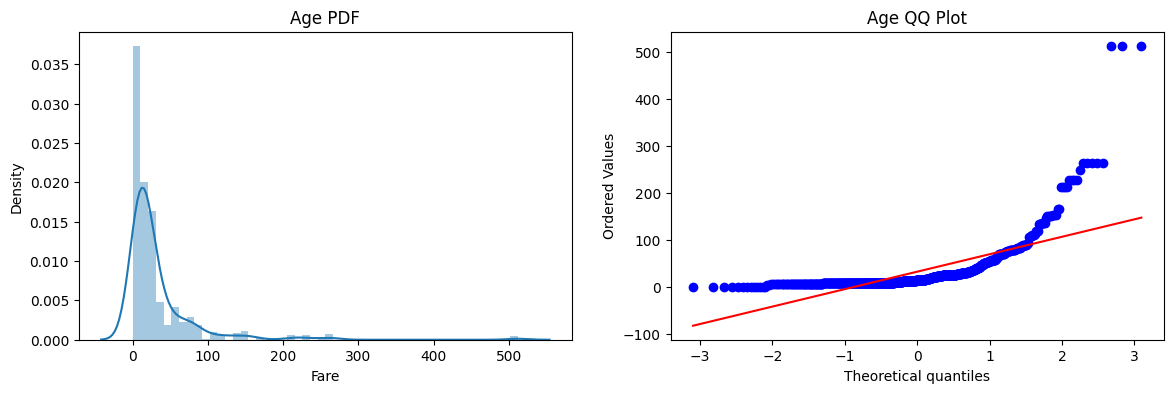

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [11]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [13]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred_lr=clf.predict(X_test)
y_pred_dt=clf2.predict(X_test)

print(f"Accuracy of LR = {accuracy_score(y_pred_lr,y_test)*100}")
print(f"Accuracy of DT = {accuracy_score(y_pred_dt,y_test)*100}")

Accuracy of LR = 64.80446927374301
Accuracy of DT = 68.71508379888269


In [14]:
# the function transformer
trf=FunctionTransformer(func=np.log1p)

# what log1p does is that it adds 1 to all the values to ensure that we have no 0 values

In [15]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [16]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred_lr=clf.predict(X_test_transformed)
y_pred_dt=clf2.predict(X_test_transformed)

print(f"Accuracy of LR = {accuracy_score(y_pred_lr,y_test)*100}")
print(f"Accuracy of DT = {accuracy_score(y_pred_dt,y_test)*100}")

Accuracy of LR = 68.15642458100558
Accuracy of DT = 67.59776536312849


In [17]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6599875156054932


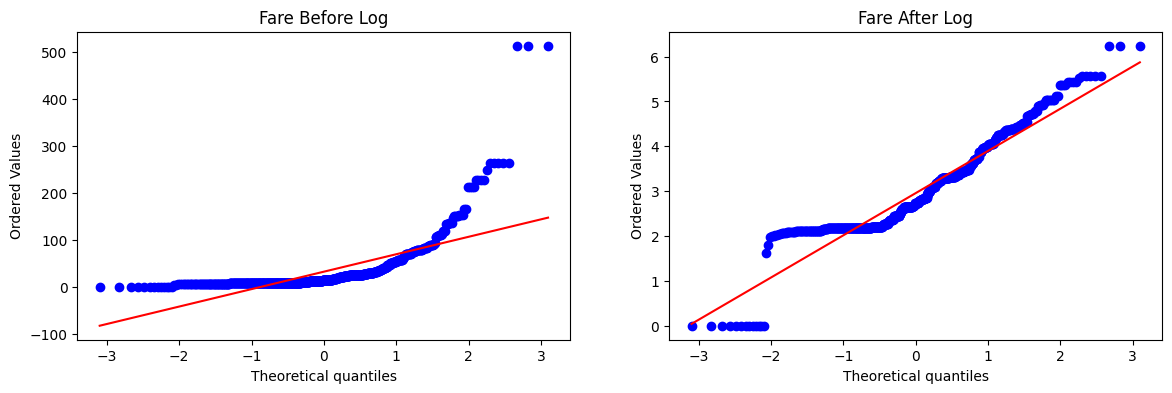

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

Age got worse

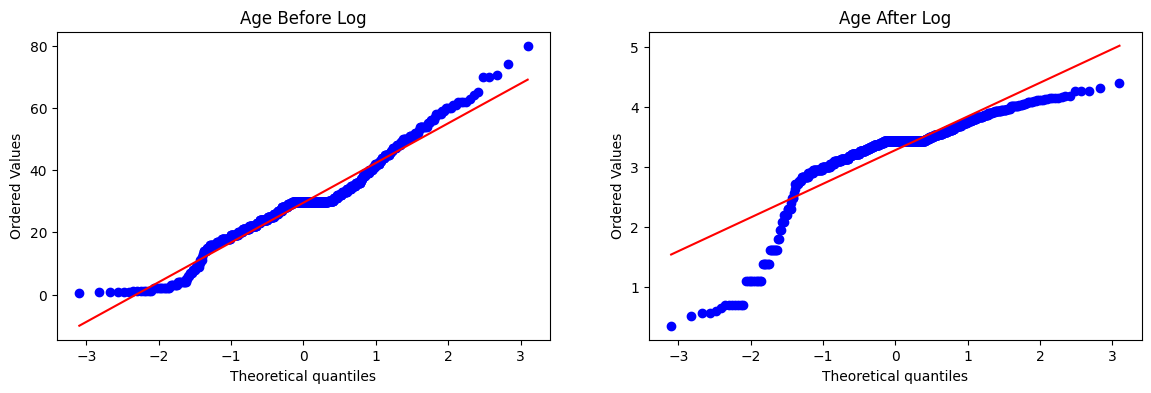

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [20]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [21]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [22]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6566167290886391


In [23]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6195131086142323


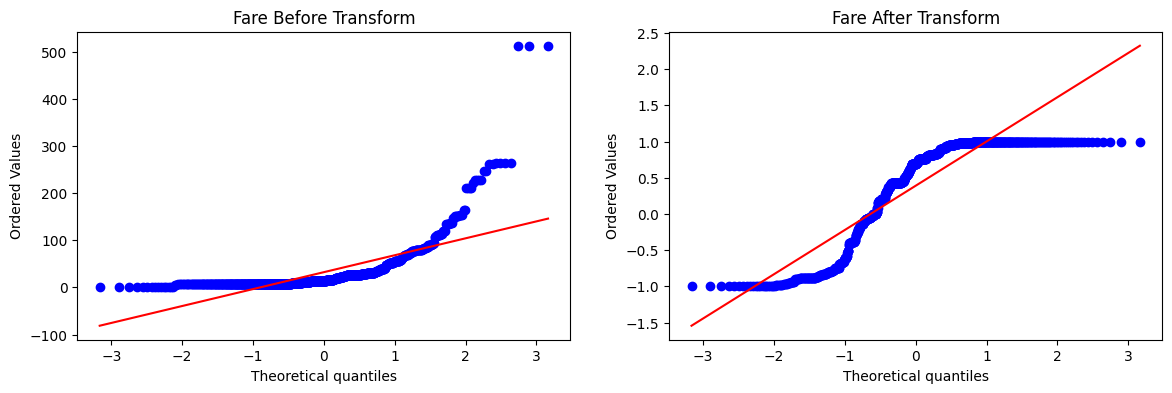

In [24]:
apply_transform(np.sin)

Accuracy 0.6150561797752809


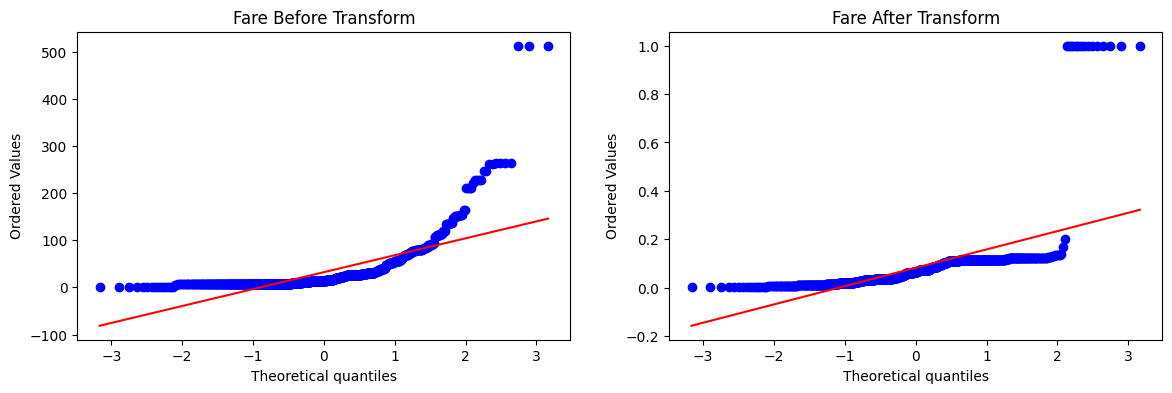

In [25]:
apply_transform(lambda x: 1/(x+1))